<a href="https://colab.research.google.com/github/AaryanBairagi/GeekForGeeks-21Days-21Projects-Challenge/blob/main/Day_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16  import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet_v2

In [2]:
(X_train,y_train) , (X_test,y_test) = cifar100.load_data()

##Converting the datatypes of images to float32 as these models expect it
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

##Images are too small of size 32x32 nad these models expect images of 224x224 so resize the images
# IMG_SIZE = 224

# X_train = tf.image.resize(X_train,[IMG_SIZE,IMG_SIZE])
# X_test = tf.image.resize(X_test,[IMG_SIZE,IMG_SIZE])

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
##one hot encoding of the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [4]:
##PREPROCESS THE TRAINING AND THE TESTING DATA
X_train_mobilenet = preprocess_mobilenet_v2(X_train)
X_test_mobilenet = preprocess_mobilenet_v2(X_test)

X_train_vgg = preprocess_vgg16(X_train)
X_test_vgg = preprocess_vgg16(X_test)

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

In [5]:
##1.BUILDING RESNET50
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

base_model_resnet50 = ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))

x =  GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024,activation='relu')(x)

predictions_x = Dense(100,activation='softmax')(x)

my_model_resnet50 = Model(inputs=base_model_resnet50.input , outputs=predictions_x)
my_model_resnet50.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
my_model_resnet50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 25,788,388 (98.37 MB)

 Trainable params: 25,735,268 (98.17 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

base_model_vgg = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
y = GlobalAveragePooling2D()(base_model_vgg.output)
y = Dense(512,activation='relu')(y)

predictions_y = Dense(100,activation='softmax')(y)
my_model_vgg = Model(inputs=base_model_vgg.input,outputs=predictions_y)

my_model_vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
my_model_vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,028,644 (57.33 MB)

 Trainable params: 15,028,644 (57.33 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model_mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(32,32,3))
z = GlobalAveragePooling2D()(base_model_mobilenet.output)
z = Dense(256,activation='relu')(z)

predictions_z = Dense(100,activation='softmax')(z)
my_model_mobilenet = Model(inputs=base_model_mobilenet.input,outputs=predictions_z)
my_model_mobilenet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
my_model_mobilenet.summary()

/tmp/ipython-input-1094866913.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,611,620 (9.96 MB)

 Trainable params: 2,577,508 (9.83 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [8]:
print("Layers in ResNet50 : " ,  len(my_model_resnet50.layers))
print("Layers in MobileNet : " ,  len(my_model_mobilenet.layers))
print("Layers in VGG16 : " ,  len(my_model_vgg.layers))

Layers in ResNet50 :  178
Layers in MobileNet :  157
Layers in VGG16 :  22


In [9]:
epochs=3
##Training only the last 30 layers and all the remaining 148 layers not trainable in ResNet50
for layer in my_model_resnet50.layers[-60:] :
    layer.trainable = True

for layer in my_model_resnet50.layers[:-60] :
    layer.trainable = False

history_trainable_resnet = my_model_resnet50.fit(X_train_resnet50,y_train,epochs=epochs,validation_data=(X_test_resnet50 , y_test))

##Training only the last 5 layers and all the remaining 17 layers not trainable in VGG
for layer in my_model_vgg.layers[-10:]:
    layer.trainable = True

for layer in my_model_vgg.layers[:-10]:
    layer.trainable = False

history_trainable_vgg = my_model_vgg.fit(X_train_vgg,y_train,epochs=epochs,validation_data=(X_test_vgg,y_test))

##Training only the last 40 layers and all the remaining 117 layers not trainable in MobileNet
for layer in my_model_mobilenet.layers[:-60]:
    layer.trainable = False

for layer in my_model_mobilenet.layers[-60:]:
    layer.trainable = True

history_mobilenetv2 = my_model_mobilenet.fit(X_train_mobilenet, y_train, epochs=epochs, validation_data=(X_test_mobilenet, y_test))


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 29ms/step - accuracy: 0.0924 - loss: 4.1546 - val_accuracy: 0.0100 - val_loss: 4.6057
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2107 - loss: 3.3019 - val_accuracy: 0.0100 - val_loss: 4.6067
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2650 - loss: 3.0194 - val_accuracy: 0.0100 - val_loss: 4.6079
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.0088 - loss: 5.0522 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.0090 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.0100 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 23ms/step - accuracy: 0.0089 - loss: 4.6387 - val_accuracy: 0.0097 - val_loss: 4.8613
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0088 - loss: 4.

In [10]:
##EVALUATING MODELS
acc_resnet50 = my_model_resnet50.evaluate(X_test_resnet50,y_test)[1]
acc_vgg = my_model_vgg.evaluate(X_test_vgg,y_test)[1]
acc_mobilenet = my_model_mobilenet.evaluate(X_test_mobilenet,y_test)[1]

print(f"ResNet50 Accuracy : {acc_resnet50:.2f}")
print(f"VGG16 Accuracy : {acc_vgg:.2f}")
print(f"MobileNet Accuracy : {acc_mobilenet:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0101 - loss: 4.6082
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0102 - loss: 4.6052
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0104 - loss: 4.6053
ResNet50 Accuracy : 0.01
VGG16 Accuracy : 0.01
MobileNet Accuracy : 0.01


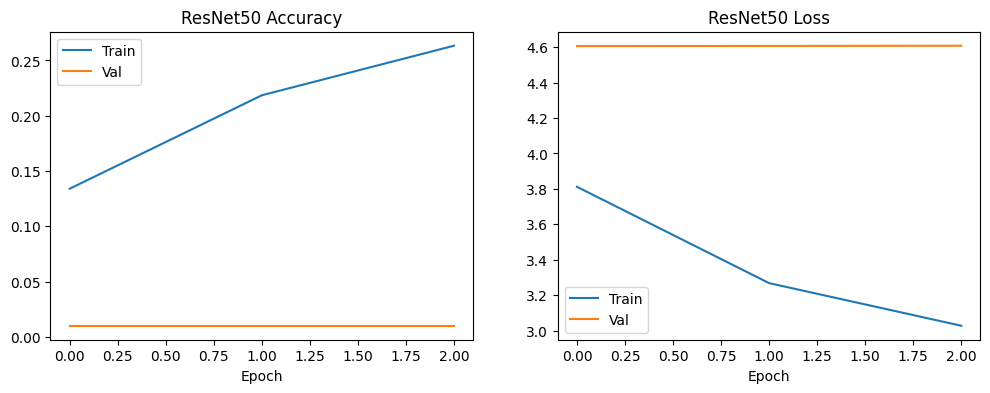

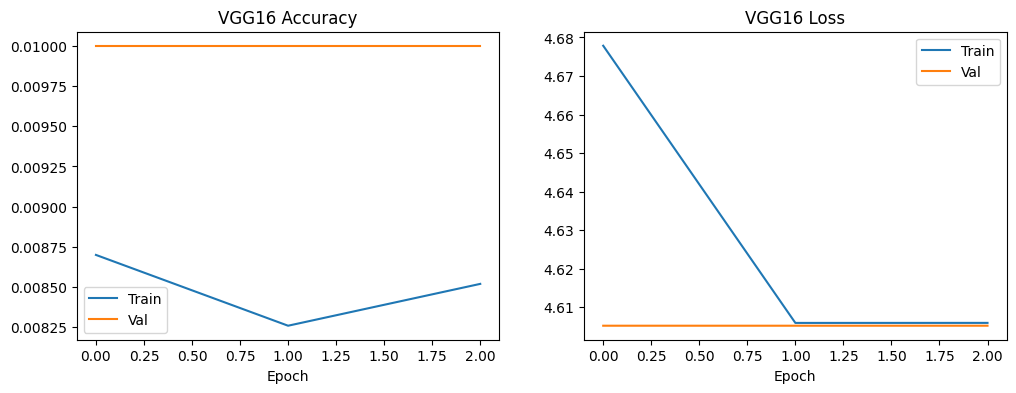

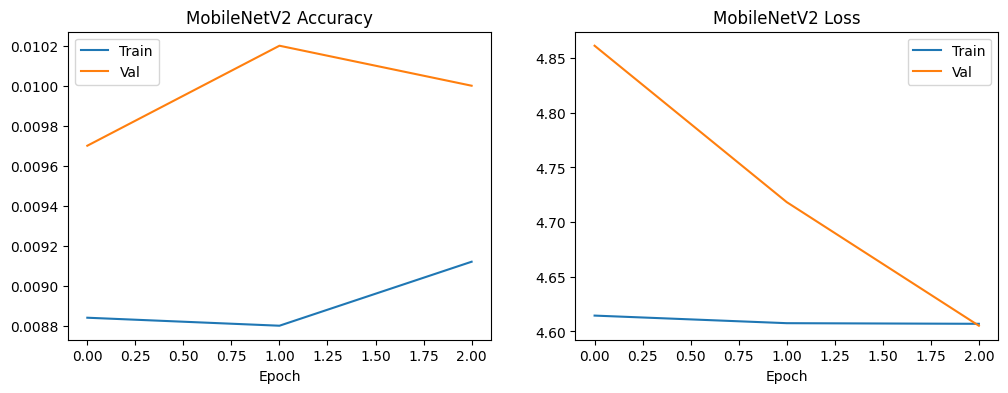

In [11]:
##VISUALIZING THE PERFORMANCE OF THE MODEL- ACCURACY VS LOSS
import matplotlib.pyplot as plt
def plot_history(history,name):
  acc , val_acc = history.history['accuracy'], history.history['val_accuracy']
  loss , val_loss = history.history['loss'] , history.history['val_loss']

  fig,axes = plt.subplots(1,2,figsize=(12,4))

    ##ACCURACY
  axes[0].plot(acc,label='Train')
  axes[0].plot(val_acc,label='Val')
  axes[0].set_title(f'{name} Accuracy')
  axes[0].set_xlabel('Epoch')
  axes[0].legend()

    ##LOSS
  axes[1].plot(loss, label='Train')
  axes[1].plot(val_loss, label='Val')
  axes[1].set_title(f'{name} Loss')
  axes[1].set_xlabel('Epoch')
  axes[1].legend()

  plt.show()

plot_history(history_trainable_resnet, "ResNet50")
plot_history(history_trainable_vgg, "VGG16")
plot_history(history_mobilenetv2, "MobileNetV2")

In [12]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


# **SUBMISSION TASK**

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 317s 182ms/step - accuracy: 0.4264 - loss: 2.2087 - val_accuracy: 0.6390 - val_loss: 1.2357
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 265s 170ms/step - accuracy: 0.7228 - loss: 0.9245 - val_accuracy: 0.6783 - val_loss: 1.1704
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 265s 170ms/step - accuracy: 0.8470 - loss: 0.4829 - val_accuracy: 0.6881 - val_loss: 1.3005
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 539s 326ms/step - accuracy: 0.0099 - loss: 5.4378 - val_accuracy: 0.0100 - val_loss: 4.6056
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 485s 310ms/step - accuracy: 0.0085 - loss: 4.6062 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 485s 310ms/step - accuracy: 0.0090 - loss: 4.6060 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 66ms/step - accuracy: 0.3778 - loss: 2.4455 - val_accuracy: 0.1620 - val_loss: 6.5637
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.6

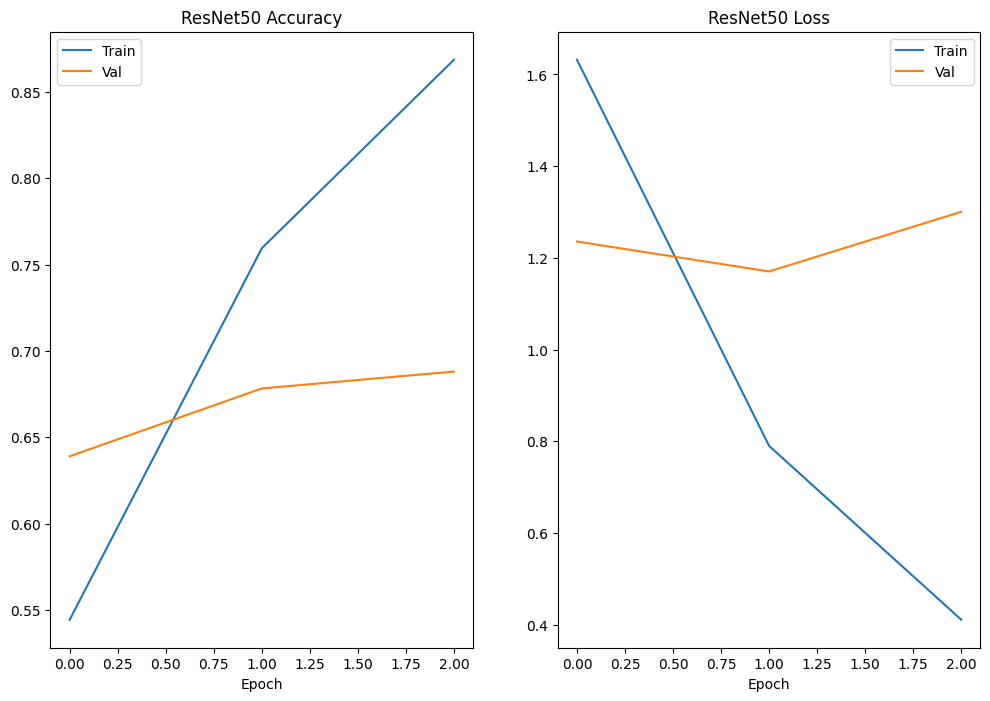

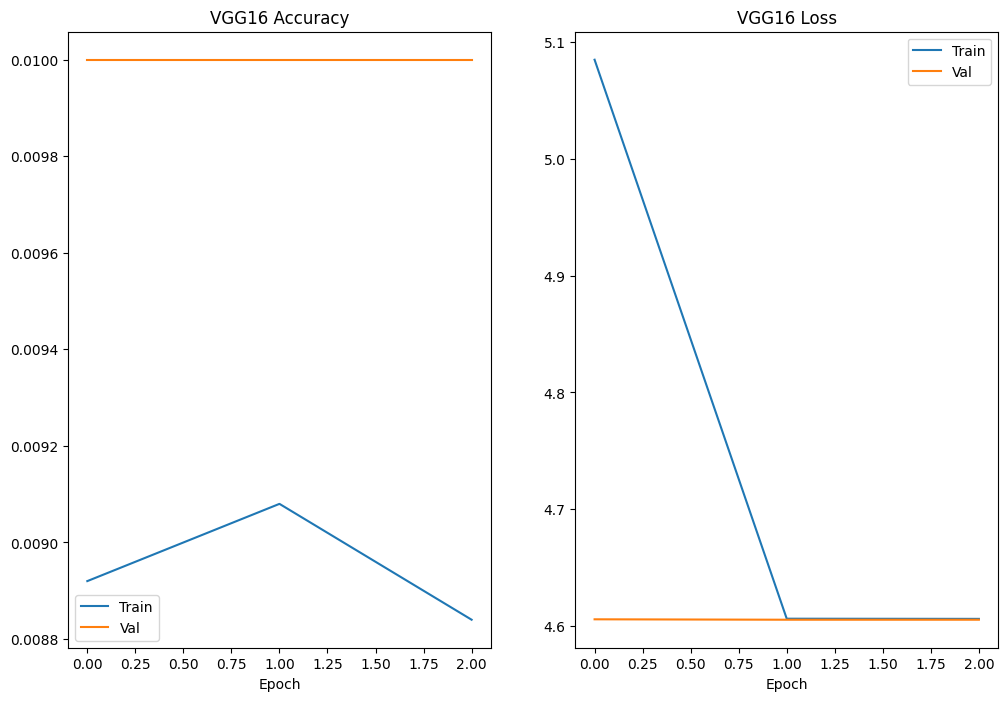

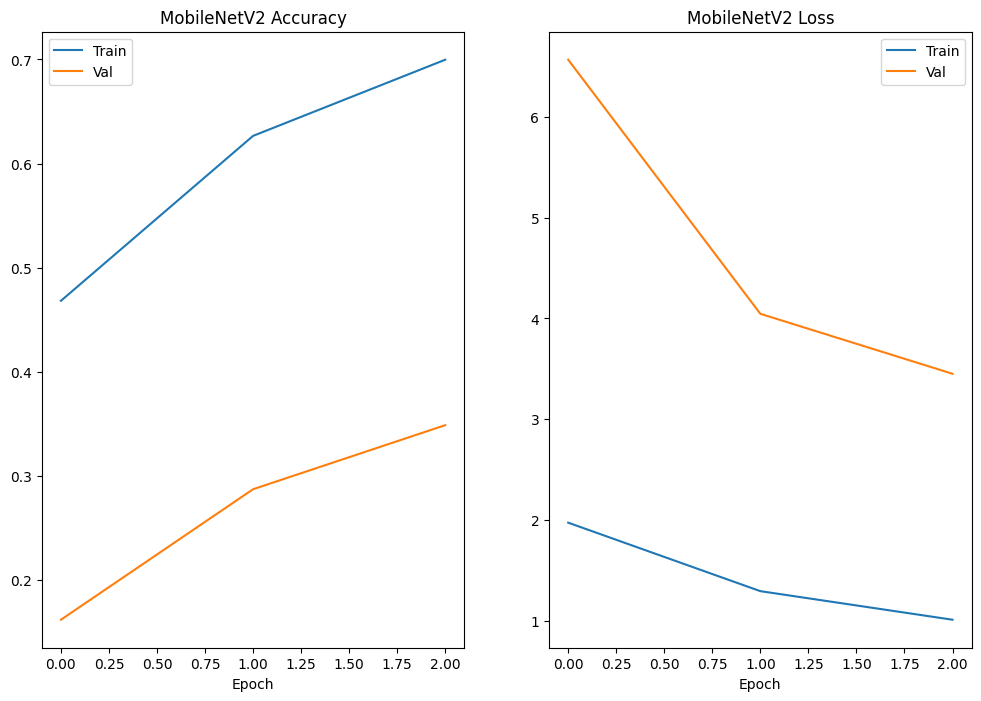

<Figure size 640x480 with 0 Axes>

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet_v2

# PARAMETERS
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
EPOCHS = 3

# 1. LOAD DATA
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

# 2. DATA PIPELINES
def preprocess_resnet(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = preprocess_resnet50(image)
    return image, label

def preprocess_vgg(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = preprocess_vgg16(image)
    return image, label

def preprocess_mobilenet(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = preprocess_mobilenet_v2(image)
    return image, label

def make_dataset(X, y, preprocess_fn):
    return (tf.data.Dataset.from_tensor_slices((X, y))
            .map(lambda x, y: (tf.cast(x, tf.float32), y), num_parallel_calls=AUTOTUNE)
            .map(preprocess_fn, num_parallel_calls=AUTOTUNE)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

# 3. BUILD DATASETS
train_ds_resnet = make_dataset(X_train, y_train_cat, preprocess_resnet)
test_ds_resnet = make_dataset(X_test, y_test_cat, preprocess_resnet)

train_ds_vgg = make_dataset(X_train, y_train_cat, preprocess_vgg)
test_ds_vgg = make_dataset(X_test, y_test_cat, preprocess_vgg)

train_ds_mobilenet = make_dataset(X_train, y_train_cat, preprocess_mobilenet)
test_ds_mobilenet = make_dataset(X_test, y_test_cat, preprocess_mobilenet)

# 4. BUILD MODELS
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# ResNet50
from tensorflow.keras.applications import ResNet50
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = GlobalAveragePooling2D()(base_resnet.output)
x = Dense(1024, activation='relu')(x)
out_x = Dense(100, activation='softmax')(x)
model_resnet = Model(inputs=base_resnet.input, outputs=out_x)
for layer in base_resnet.layers:
    layer.trainable = False
for layer in base_resnet.layers[-60:]:
    layer.trainable = True
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# VGG16
from tensorflow.keras.applications import VGG16
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
y = GlobalAveragePooling2D()(base_vgg.output)
y = Dense(512, activation='relu')(y)
out_y = Dense(100, activation='softmax')(y)
model_vgg = Model(inputs=base_vgg.input, outputs=out_y)
for layer in base_vgg.layers:
    layer.trainable = False
for layer in base_vgg.layers[-10:]:
    layer.trainable = True
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# MobileNetV2
from tensorflow.keras.applications import MobileNetV2
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
z = GlobalAveragePooling2D()(base_mobilenet.output)
z = Dense(256, activation='relu')(z)
out_z = Dense(100, activation='softmax')(z)
model_mobilenet = Model(inputs=base_mobilenet.input, outputs=out_z)
for layer in base_mobilenet.layers:
    layer.trainable = False
for layer in base_mobilenet.layers[-60:]:
    layer.trainable = True
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. TRAIN MODELS
history_resnet = model_resnet.fit(train_ds_resnet, epochs=EPOCHS, validation_data=test_ds_resnet)
history_vgg = model_vgg.fit(train_ds_vgg, epochs=EPOCHS, validation_data=test_ds_vgg)
history_mobilenet = model_mobilenet.fit(train_ds_mobilenet, epochs=EPOCHS, validation_data=test_ds_mobilenet)

# 6. EVALUATE
acc_resnet = model_resnet.evaluate(test_ds_resnet)[1]
acc_vgg = model_vgg.evaluate(test_ds_vgg)[1]
acc_mobilenet = model_mobilenet.evaluate(test_ds_mobilenet)[1]
print(f"ResNet50 Accuracy : {acc_resnet:.2f}")
print(f"VGG16 Accuracy : {acc_vgg:.2f}")
print(f"MobileNet Accuracy : {acc_mobilenet:.2f}")

# 7. PLOT FUNCTION
import matplotlib.pyplot as plt
def plot_history(history, name):
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    fig, axes = plt.subplots(1, 2, figsize=(12,8))
    axes[0].plot(acc, label='Train')
    axes[0].plot(val_acc, label='Val')
    axes[0].set_title(f'{name} Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()
    axes[1].plot(loss, label='Train')
    axes[1].plot(val_loss, label='Val')
    axes[1].set_title(f'{name} Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend()
    plt.show()

